## DATA PREPARATION


import library

In [ ]:
import pandas as pd

import data

In [ ]:
df_hotel = pd.read_csv("/content/reservasi_hotel.csv")

In [ ]:
df_hotel

,reservation_id,guest_name,hotel_name,room_type,check_in,check_out,nights,guests,price_per_night,total_price,payment_method,booking_source,is_cancelled
0,5b02d2f3-3a62-4071-81bd-43b8e352b770,Jessica Bennett,Bukit Indah Hotel,Deluxe,2024/10/08,10/11/2024,3,5,983914,2951742,Cash,Website,1
1,6770f779-d66c-4489-b459-6bbdb0bcc342,gloria jones,ocean view resort,standard,2024/12/20,12/30/2024,10,satu,1460335,14603350,cash,walk-in,0
2,f7e7ec58-70a7-46d9-bd37-d2e391cf99b4,lori jensen,grand nusantara,suite,2024/08/14,8/27/2024,13,2,1424904,18523752,online transfer,travel agent,1
3,2f9a820d-d160-438a-a4fe-e63576585641,Matthew Williams,Ocean View Resort,Standard,2025/03/07,3/12/2025,5,2,1460335,7301675,Cash,Website,1
4,fa659ab7-03f8-4d5e-94f8-fe73712d794e,sarah mitchell,bukit indah hotel,standard,2024/12/05,12/12/2024,7,4,1238936,8672552,debit card,website,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,b23423e1-0139-4ec9-9791-2867b6ad4b6a,cory whitehead,surya palace,standard,2025/06/17,6/26/2025,9,satu,1053962,9485658,debit card,website,0
1541,87203e22-7ce7-4351-aa10-4909d28e10b3,lisa walton,surya palace,single,2025/03/05,3/9/2025,4,2,500583,2002332,debit card,travel agent,0
1542,adc872b5-f1c6-4820-9f6c-948e814ecd9b,rachael smith,bukit indah hotel,suite,2025/02/02,2/6/2025,4,5,383012,1532048,online transfer,walk-in,0
1543,f4d079cd-0185-4f1d-b2a3-cca33763cc2f,Robert Mcpherson,Bukit Indah Hotel,Standard,2025/07/05,7/13/2025,8,3,1238936,9911488,Debit Card,Travel Agent,1


## DATA CLEANING & EDA


In [ ]:
df = df_hotel.drop(columns=['reservation_id'])


In [ ]:
df

,guest_name,hotel_name,room_type,check_in,check_out,nights,guests,price_per_night,total_price,payment_method,booking_source,is_cancelled
0,Jessica Bennett,Bukit Indah Hotel,Deluxe,2024/10/08,10/11/2024,3,5,983914,2951742,Cash,Website,1
1,gloria jones,ocean view resort,standard,2024/12/20,12/30/2024,10,satu,1460335,14603350,cash,walk-in,0
2,lori jensen,grand nusantara,suite,2024/08/14,8/27/2024,13,2,1424904,18523752,online transfer,travel agent,1
3,Matthew Williams,Ocean View Resort,Standard,2025/03/07,3/12/2025,5,2,1460335,7301675,Cash,Website,1
4,sarah mitchell,bukit indah hotel,standard,2024/12/05,12/12/2024,7,4,1238936,8672552,debit card,website,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1540,cory whitehead,surya palace,standard,2025/06/17,6/26/2025,9,satu,1053962,9485658,debit card,website,0
1541,lisa walton,surya palace,single,2025/03/05,3/9/2025,4,2,500583,2002332,debit card,travel agent,0
1542,rachael smith,bukit indah hotel,suite,2025/02/02,2/6/2025,4,5,383012,1532048,online transfer,walk-in,0
1543,Robert Mcpherson,Bukit Indah Hotel,Standard,2025/07/05,7/13/2025,8,3,1238936,9911488,Debit Card,Travel Agent,1


In [ ]:
# Kamus angka
mapping = {
    'satu': 1,
    'dua': 2,
    'tiga': 3,
    'empat': 4,
    'lima': 5,
    'enam': 6,
    'tujuh': 7,
    'delapan': 8,
    'sembilan': 9,
    'sepuluh': 10
}

# Normalisasi
df['guests'] = df['guests'].astype(str).str.lower()

# Ambil angka dari string
df['guests_num'] = df['guests'].str.extract('(\d+)')

# Isi yang kosong dengan mapping
df['guests_num'] = df['guests_num'].fillna(df['guests'].map(mapping))

# Konversi ke numeric
df['guests_num'] = pd.to_numeric(df['guests_num'], errors='coerce')

<>:19: SyntaxWarning: invalid escape sequence '\d'
<>:19: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-614411857.py:19: SyntaxWarning: invalid escape sequence '\d'
  df['guests_num'] = df['guests'].str.extract('(\d+)')


In [ ]:
df['booking_source'] = df['booking_source'].str.lower().str.title()

In [ ]:
hitung_pembagian = df['booking_source'].value_counts()

In [ ]:
hitung_pembagian

,count
booking_source,
Travel Agent,385
Mobile App,384
Website,357
Walk-In,343


In [ ]:
# Normalisasi: jadikan huruf kecil semua, lalu kapitalisasi awal tiap kata
df['payment_method'] = df['payment_method'].str.lower().str.title()

In [ ]:
pembayaran = df['payment_method'].value_counts()

In [ ]:
pembayaran

,count
payment_method,
Online Transfer,406
Debit Card,404
Credit Card,346
Cash,306
Tunai,83


In [ ]:
laris = df['hotel_name'] = df['hotel_name'].str.lower().str.title()

In [ ]:
terlaris = df['hotel_name'].value_counts()


In [ ]:
terlaris

,count
hotel_name,
Ocean View Resort,322
Grand Nusantara,322
Surya Palace,311
Hotel Mawar,300
Bukit Indah Hotel,290


In [ ]:
# Buat kategori
def kategori_guest(x):
    if x == 1:
        return "Solo Traveler"
    elif x == 2:
        return "Couple/Partner"
    elif 3 <= x <= 4:
        return "Small Family"
    elif x > 4:
        return "Family/Group"
    else:
        return "Unknown"

df['guest_category'] = df['guests_num'].apply(kategori_guest)

In [ ]:
df

,guest_name,hotel_name,room_type,check_in,check_out,nights,guests,price_per_night,total_price,payment_method,booking_source,is_cancelled,guests_num,guest_category
0,Jessica Bennett,Bukit Indah Hotel,Deluxe,2024/10/08,10/11/2024,3,5,983914,2951742,Cash,Website,1,5.0,Family/Group
1,gloria jones,Ocean View Resort,standard,2024/12/20,12/30/2024,10,satu,1460335,14603350,Cash,Walk-In,0,1.0,Solo Traveler
2,lori jensen,Grand Nusantara,suite,2024/08/14,8/27/2024,13,2,1424904,18523752,Online Transfer,Travel Agent,1,2.0,Couple/Partner
3,Matthew Williams,Ocean View Resort,Standard,2025/03/07,3/12/2025,5,2,1460335,7301675,Cash,Website,1,2.0,Couple/Partner
4,sarah mitchell,Bukit Indah Hotel,standard,2024/12/05,12/12/2024,7,4,1238936,8672552,Debit Card,Website,0,4.0,Small Family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,cory whitehead,Surya Palace,standard,2025/06/17,6/26/2025,9,satu,1053962,9485658,Debit Card,Website,0,1.0,Solo Traveler
1541,lisa walton,Surya Palace,single,2025/03/05,3/9/2025,4,2,500583,2002332,Debit Card,Travel Agent,0,2.0,Couple/Partner
1542,rachael smith,Bukit Indah Hotel,suite,2025/02/02,2/6/2025,4,5,383012,1532048,Online Transfer,Walk-In,0,5.0,Family/Group
1543,Robert Mcpherson,Bukit Indah Hotel,Standard,2025/07/05,7/13/2025,8,3,1238936,9911488,Debit Card,Travel Agent,1,3.0,Small Family


In [ ]:

# Pastikan guests numeric
df['guests'] = pd.to_numeric(df['guests'], errors='coerce')

# Buat kolom kategori
df['guest_category'] = df['guests'].apply(kategori_guest)

# Group by hotel & kategori
final_table = df.groupby(['hotel_name', 'guest_category']).size().reset_index(name='jumlah')

final_table

,hotel_name,guest_category,jumlah
0,Bukit Indah Hotel,Couple/Partner,71
1,Bukit Indah Hotel,Family/Group,53
2,Bukit Indah Hotel,Small Family,109
3,Bukit Indah Hotel,Solo Traveler,41
4,Bukit Indah Hotel,Unknown,16
5,Grand Nusantara,Couple/Partner,54
6,Grand Nusantara,Family/Group,74
7,Grand Nusantara,Small Family,129
8,Grand Nusantara,Solo Traveler,44
9,Grand Nusantara,Unknown,21


In [ ]:
# Ambil kategori dengan jumlah terbesar tiap hotel
hasil = df.loc[df.groupby("hotel_name")["guests"].idxmax(), ["hotel_name", "guest_category"]]
hasil

,hotel_name,guest_category
566,Bukit Indah Hotel,Family/Group
614,Grand Nusantara,Family/Group
283,Hotel Mawar,Family/Group
1458,Ocean View Resort,Family/Group
1260,Surya Palace,Family/Group


In [ ]:
import pandas as pd
import numpy as np

# --- 1. Mapping kategori -> estimasi jumlah tamu ---
category_to_guest = {
    'Solo Traveler': 1,
    'Couple/Partner': 2,
    'Small Family': 3,      # asumsi 3
    'Family/Group': 4,      # asumsi minimal 4
}

# --- 2. Isi guests_num yang kosong pakai kategori kalau ada ---
df['guests_num'] = df.apply(
    lambda row: category_to_guest.get(row['guest_category'], np.nan)
                if pd.isna(row['guests_num']) else row['guests_num'],
    axis=1
)

# --- 3. Fungsi imputasi kategori Unknown ---
def impute_category(row, majority_map):
    if row['guest_category'] != 'Unknown':
        return row['guest_category']

    # Berdasarkan jumlah tamu (kalau sudah ada)
    if pd.notna(row['guests_num']):
        if row['guests_num'] >= 3:
            return 'Family/Group'
        elif row['guests_num'] == 2:
            return 'Couple/Partner'
        elif row['guests_num'] == 1:
            return 'Solo Traveler'

    # Berdasarkan tipe kamar
    if pd.notna(row['room_type']):
        room = row['room_type'].lower()
        if 'family' in room or 'suite' in room:
            return 'Family/Group'
        elif 'single' in room or 'standard' in room:
            return 'Solo Traveler'
        elif 'double' in room or 'queen' in room or 'king' in room:
            return 'Couple/Partner'

    # Berdasarkan lama menginap
    if pd.notna(row['stay_length']):
        if row['stay_length'] <= 3:
            return 'Family/Group'
        elif 4 <= row['stay_length'] <= 7:
            return 'Couple/Partner'
        elif row['stay_length'] > 7:
            return 'Solo Traveler'

    # Fallback: mayoritas di hotel
    return majority_map.get(row['hotel_name'], 'Solo Traveler')

# --- 4. Cari mayoritas kategori per hotel ---
majority_map = (
    df[df['guest_category'] != 'Unknown']
    .groupby('hotel_name')['guest_category']
    .agg(lambda x: x.value_counts().idxmax())
    .to_dict()
)

# --- 5. Terapkan ---
df['guest_category_filled'] = df.apply(lambda row: impute_category(row, majority_map), axis=1)


In [ ]:
df

,guest_name,hotel_name,room_type,check_in,check_out,nights,guests,price_per_night,total_price,payment_method,booking_source,is_cancelled,guests_num,guest_category,guest_category_filled
0,Jessica Bennett,Bukit Indah Hotel,Deluxe,2024/10/08,10/11/2024,3,5.0,983914,2951742,Cash,Website,1,5.0,Family/Group,Family/Group
1,gloria jones,Ocean View Resort,standard,2024/12/20,12/30/2024,10,NaN,1460335,14603350,Cash,Walk-In,0,1.0,Unknown,Solo Traveler
2,lori jensen,Grand Nusantara,suite,2024/08/14,8/27/2024,13,2.0,1424904,18523752,Online Transfer,Travel Agent,1,2.0,Couple/Partner,Couple/Partner
3,Matthew Williams,Ocean View Resort,Standard,2025/03/07,3/12/2025,5,2.0,1460335,7301675,Cash,Website,1,2.0,Couple/Partner,Couple/Partner
4,sarah mitchell,Bukit Indah Hotel,standard,2024/12/05,12/12/2024,7,4.0,1238936,8672552,Debit Card,Website,0,4.0,Small Family,Small Family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1540,cory whitehead,Surya Palace,standard,2025/06/17,6/26/2025,9,NaN,1053962,9485658,Debit Card,Website,0,1.0,Unknown,Solo Traveler
1541,lisa walton,Surya Palace,single,2025/03/05,3/9/2025,4,2.0,500583,2002332,Debit Card,Travel Agent,0,2.0,Couple/Partner,Couple/Partner
1542,rachael smith,Bukit Indah Hotel,suite,2025/02/02,2/6/2025,4,5.0,383012,1532048,Online Transfer,Walk-In,0,5.0,Family/Group,Family/Group
1543,Robert Mcpherson,Bukit Indah Hotel,Standard,2025/07/05,7/13/2025,8,3.0,1238936,9911488,Debit Card,Travel Agent,1,3.0,Small Family,Small Family


In [ ]:
# Cek jumlah baris duplikat
print("Jumlah duplikat:", df.duplicated().sum())




Jumlah duplikat: 0


In [ ]:
df = df.drop_duplicates()


In [ ]:
df

,guest_name,hotel_name,room_type,check_in,check_out,nights,guests,price_per_night,total_price,payment_method,booking_source,is_cancelled,guests_num,guest_category,guest_category_filled
0,Jessica Bennett,Bukit Indah Hotel,Deluxe,2024/10/08,10/11/2024,3,5.0,983914,2951742,Cash,Website,1,5.0,Family/Group,Family/Group
1,gloria jones,Ocean View Resort,standard,2024/12/20,12/30/2024,10,NaN,1460335,14603350,Cash,Walk-In,0,1.0,Unknown,Solo Traveler
2,lori jensen,Grand Nusantara,suite,2024/08/14,8/27/2024,13,2.0,1424904,18523752,Online Transfer,Travel Agent,1,2.0,Couple/Partner,Couple/Partner
3,Matthew Williams,Ocean View Resort,Standard,2025/03/07,3/12/2025,5,2.0,1460335,7301675,Cash,Website,1,2.0,Couple/Partner,Couple/Partner
4,sarah mitchell,Bukit Indah Hotel,standard,2024/12/05,12/12/2024,7,4.0,1238936,8672552,Debit Card,Website,0,4.0,Small Family,Small Family
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,meghan vasquez,Grand Nusantara,family,2024/08/30,9/10/2024,11,3.0,567067,6237737,Online Transfer,Mobile App,1,3.0,Small Family,Small Family
1496,ann cunningham,Surya Palace,family,2024/08/23,9/3/2024,11,2.0,377215,4149365,Cash,Website,0,2.0,Couple/Partner,Couple/Partner
1497,gary fuller,Bukit Indah Hotel,suite,2024/11/01,11/4/2024,3,4.0,383012,1149036,Online Transfer,Travel Agent,1,4.0,Small Family,Small Family
1498,Alexander Smith,Hotel Mawar,Standard,2025/02/11,2/23/2025,12,1.0,1358180,16298160,Cash,Mobile App,1,1.0,Solo Traveler,Solo Traveler


In [ ]:
# kalau sudah yakin tidak ada NaN:

# --- kalau masih ada NaN (biar aman), gunakan Int64 ---
df['guests_num'] = df['guests_num'].astype('Int64')

/tmp/ipython-input-280153064.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['guests_num'] = df['guests_num'].astype('Int64')


In [ ]:
# 1. Hitung jumlah kategori per hotel setelah Unknown diisi
summary = (
    df.groupby(["hotel_name", "guest_category_filled"])
      .size()
      .reset_index(name="jumlah")
)

# 2. Ambil kategori dengan jumlah terbanyak di setiap hotel
hasil_final = summary.loc[
    summary.groupby("hotel_name")["jumlah"].idxmax(),
    ["hotel_name", "guest_category_filled", "jumlah"]
].reset_index(drop=True)

hasil_final

,hotel_name,guest_category_filled,jumlah
0,Bukit Indah Hotel,Small Family,104
1,Grand Nusantara,Small Family,122
2,Hotel Mawar,Small Family,106
3,Ocean View Resort,Small Family,142
4,Surya Palace,Small Family,122


In [ ]:

# Group by hotel & kategori
final_table = df.groupby(['hotel_name', 'guest_category_filled']).size().reset_index(name='jumlah')

final_table

,hotel_name,guest_category_filled,jumlah
0,Bukit Indah Hotel,Couple/Partner,67
1,Bukit Indah Hotel,Family/Group,52
2,Bukit Indah Hotel,Small Family,104
3,Bukit Indah Hotel,Solo Traveler,57
4,Grand Nusantara,Couple/Partner,53
5,Grand Nusantara,Family/Group,73
6,Grand Nusantara,Small Family,122
7,Grand Nusantara,Solo Traveler,65
8,Hotel Mawar,Couple/Partner,55
9,Hotel Mawar,Family/Group,62


In [ ]:
# Buat pivot table
gabungan = (
    df.groupby(["hotel_name", "guest_category_filled"])["guests"]
      .sum()
      .unstack(fill_value=0)   # bikin kategori jadi kolom
      .reset_index()
)

In [ ]:
gabungan

guest_category_filled,hotel_name,Couple/Partner,Family/Group,Small Family,Solo Traveler
0,Bukit Indah Hotel,134.0,2035.0,363.0,41.0
1,Grand Nusantara,106.0,1935.0,418.0,44.0
2,Hotel Mawar,110.0,2670.0,369.0,57.0
3,Ocean View Resort,120.0,2220.0,500.0,37.0
4,Surya Palace,132.0,1855.0,425.0,38.0


In [ ]:
def kategori_usia(payment, room):
    if payment == "Cash" and room in ["Deluxe", "Suite", "Family"]:
        return "Lanjut Usia (51+)"
    elif payment in ["Debit Card", "Credit Card"] and room in ["Standard", "Deluxe"]:
        return "Dewasa (31–50)"
    elif payment in ["Online Transfer", "E-Wallet"] or room in ["Standard", "Single", "Budget"]:
        return "Muda (18–30)"
    else:
        return "Dewasa (31–50)"  # fallback

df["kategori_usia"] = df.apply(lambda x: kategori_usia(x["payment_method"], str(x["room_type"]).title()), axis=1)

# tampilkan hasil
print(df[["guest_name", "payment_method", "room_type", "kategori_usia"]].head(10))


         guest_name   payment_method room_type      kategori_usia
0   Jessica Bennett             Cash    Deluxe  Lanjut Usia (51+)
1      gloria jones             Cash  standard       Muda (18–30)
2       lori jensen  Online Transfer     suite       Muda (18–30)
3  Matthew Williams             Cash  Standard       Muda (18–30)
4    sarah mitchell       Debit Card  standard     Dewasa (31–50)
5     william ayers             Cash       NaN     Dewasa (31–50)
6       Michael Fox      Credit Card    Family     Dewasa (31–50)
7        Jamie Page             Cash    Family  Lanjut Usia (51+)
8        Luke Smith  Online Transfer    Single       Muda (18–30)
9      Karina Knapp       Debit Card    Single       Muda (18–30)


/tmp/ipython-input-1817446003.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["kategori_usia"] = df.apply(lambda x: kategori_usia(x["payment_method"], str(x["room_type"]).title()), axis=1)


In [ ]:
df

,guest_name,hotel_name,room_type,check_in,check_out,nights,guests,price_per_night,total_price,payment_method,booking_source,is_cancelled,guests_num,guest_category,guest_category_filled,kategori_usia
0,Jessica Bennett,Bukit Indah Hotel,Deluxe,2024/10/08,10/11/2024,3,5.0,983914,2951742,Cash,Website,1,5,Family/Group,Family/Group,Lanjut Usia (51+)
1,gloria jones,Ocean View Resort,standard,2024/12/20,12/30/2024,10,NaN,1460335,14603350,Cash,Walk-In,0,1,Unknown,Solo Traveler,Muda (18–30)
2,lori jensen,Grand Nusantara,suite,2024/08/14,8/27/2024,13,2.0,1424904,18523752,Online Transfer,Travel Agent,1,2,Couple/Partner,Couple/Partner,Muda (18–30)
3,Matthew Williams,Ocean View Resort,Standard,2025/03/07,3/12/2025,5,2.0,1460335,7301675,Cash,Website,1,2,Couple/Partner,Couple/Partner,Muda (18–30)
4,sarah mitchell,Bukit Indah Hotel,standard,2024/12/05,12/12/2024,7,4.0,1238936,8672552,Debit Card,Website,0,4,Small Family,Small Family,Dewasa (31–50)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,meghan vasquez,Grand Nusantara,family,2024/08/30,9/10/2024,11,3.0,567067,6237737,Online Transfer,Mobile App,1,3,Small Family,Small Family,Muda (18–30)
1496,ann cunningham,Surya Palace,family,2024/08/23,9/3/2024,11,2.0,377215,4149365,Cash,Website,0,2,Couple/Partner,Couple/Partner,Lanjut Usia (51+)
1497,gary fuller,Bukit Indah Hotel,suite,2024/11/01,11/4/2024,3,4.0,383012,1149036,Online Transfer,Travel Agent,1,4,Small Family,Small Family,Muda (18–30)
1498,Alexander Smith,Hotel Mawar,Standard,2025/02/11,2/23/2025,12,1.0,1358180,16298160,Cash,Mobile App,1,1,Solo Traveler,Solo Traveler,Muda (18–30)


## VISUALIZATION


```
# This is formatted as code
```



### Dari analisis yang kami lakukan didapatkan beberapa informasi yang kami rasa penting untuk menganalisis lebih lanjut dalam mengambil keputusan bisnis serta memperluas target pelanggan bisnis

## 1. Bahwa setiap hotel  Mayoritas tamu hotel berasal dari kelompok usia muda (18–30) dan dewasa (31–50), sehingga strategi bisnis jangka pendek perlu difokuskan pada penguatan layanan, fasilitas, serta promosi yang relevan bagi kedua segmen ini. Sementara itu, jumlah tamu lanjut usia (51+) masih relatif rendah, sehingga menjadi peluang jangka panjang untuk dikembangkan melalui peningkatan fasilitas ramah lansia dan paket wisata khusus. Dengan demikian, setiap hotel dapat mengoptimalkan segmen pasarnya masing-masing: Grand Nusantara untuk tamu muda, Surya Palace untuk keluarga dan tamu dewasa, serta Ocean View Resort sebagai hotel dengan daya tarik lintas segmen.

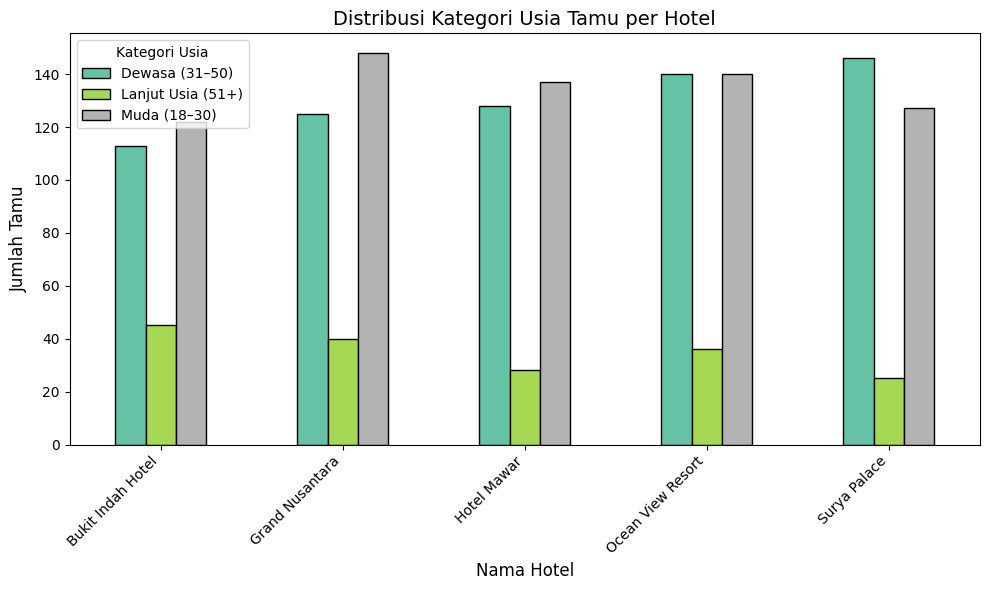

In [ ]:
import matplotlib.pyplot as plt

# Hitung jumlah tamu per hotel per kategori usia
usia_per_hotel = df.groupby(["hotel_name", "kategori_usia"]).size().unstack(fill_value=0)

# Plot stacked bar chart
usia_per_hotel.plot(
    kind="bar",
    stacked=False,   # tidak ditumpuk
    figsize=(10,6),
    colormap="Set2",
    edgecolor="black"
)

plt.title("Distribusi Kategori Usia Tamu per Hotel", fontsize=14)
plt.xlabel("Nama Hotel", fontsize=12)
plt.ylabel("Jumlah Tamu", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Kategori Usia")
plt.tight_layout()
plt.show()



## Mayoritas tamu hotel berasal dari kategori Small Family, sehingga strategi utama perlu difokuskan pada penyediaan fasilitas dan paket layanan keluarga. Segmen Couple/Partner dan Family/Group juga menunjukkan jumlah yang stabil, sehingga dapat menjadi target pendukung dengan promosi khusus pasangan maupun kelompok. Sementara itu, meskipun jumlah Solo Traveler relatif kecil, kategori ini berpotensi dikembangkan di hotel tertentu seperti Hotel Mawar dan Grand Nusantara melalui layanan ramah individu dan paket perjalanan personal.

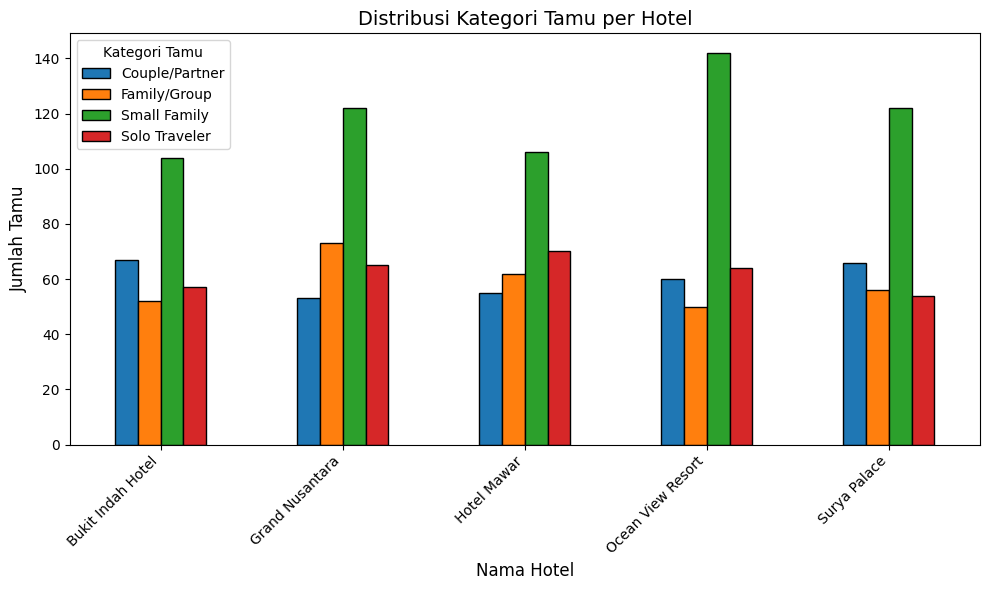

In [ ]:
# Pivot supaya kategori jadi kolom
pivot_table = final_table.pivot(index="hotel_name", columns="guest_category_filled", values="jumlah").fillna(0)

# Plot grouped bar chart
pivot_table.plot(
    kind="bar",
    figsize=(10,6),
    edgecolor="black"
)

plt.title("Distribusi Kategori Tamu per Hotel", fontsize=14)
plt.xlabel("Nama Hotel", fontsize=12)
plt.ylabel("Jumlah Tamu", fontsize=12)
plt.xticks(rotation=45, ha="right")
plt.legend(title="Kategori Tamu")
plt.tight_layout()
plt.show()


In [ ]:
# Hitung expected total
df["expected_total"] = df["price_per_night"] * df["nights"]

# Buat kolom preferensi
def cek_preferensi(row):
    if row["total_price"] < row["expected_total"]:
        return "Harga/Discount"
    else:
        return "Kenyamanan"

df["preferensi"] = df.apply(cek_preferensi, axis=1)

# Cek hasil
df[["guest_name", "guest_category_filled", "room_type",
          "price_per_night", "nights", "expected_total",
          "total_price", "preferensi"]]


/tmp/ipython-input-4258530432.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["expected_total"] = df["price_per_night"] * df["nights"]
/tmp/ipython-input-4258530432.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["preferensi"] = df.apply(cek_preferensi, axis=1)


,guest_name,guest_category_filled,room_type,price_per_night,nights,expected_total,total_price,preferensi
0,Jessica Bennett,Family/Group,Deluxe,983914,3,2951742,2951742,Kenyamanan
1,gloria jones,Solo Traveler,standard,1460335,10,14603350,14603350,Kenyamanan
2,lori jensen,Couple/Partner,suite,1424904,13,18523752,18523752,Kenyamanan
3,Matthew Williams,Couple/Partner,Standard,1460335,5,7301675,7301675,Kenyamanan
4,sarah mitchell,Small Family,standard,1238936,7,8672552,8672552,Kenyamanan
...,...,...,...,...,...,...,...,...
1495,meghan vasquez,Small Family,family,567067,11,6237737,6237737,Kenyamanan
1496,ann cunningham,Couple/Partner,family,377215,11,4149365,4149365,Kenyamanan
1497,gary fuller,Small Family,suite,383012,3,1149036,1149036,Kenyamanan
1498,Alexander Smith,Solo Traveler,Standard,1358180,12,16298160,16298160,Kenyamanan


In [ ]:
# Hitung jumlah masing-masing preferensi
preferensi_counts = df["preferensi"].value_counts().reset_index()
preferensi_counts.columns = ["preferensi", "jumlah"]

print(preferensi_counts)


   preferensi  jumlah
0  Kenyamanan    1500


In [ ]:
preferensi_counts["persentase"] = (preferensi_counts["jumlah"] / preferensi_counts["jumlah"].sum()) * 100
print(preferensi_counts)


   preferensi  jumlah  persentase
0  Kenyamanan    1500       100.0


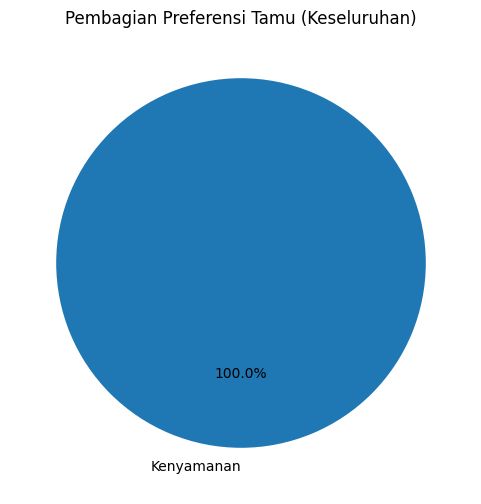

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(preferensi_counts["jumlah"],
        labels=preferensi_counts["preferensi"],
        autopct="%1.1f%%", startangle=90, counterclock=False)

plt.title("Pembagian Preferensi Tamu (Keseluruhan)")
plt.show()


In [ ]:
df

,guest_name,hotel_name,room_type,check_in,check_out,nights,guests,price_per_night,total_price,payment_method,booking_source,is_cancelled,guests_num,guest_category,guest_category_filled,kategori_usia,expected_total,preferensi
0,Jessica Bennett,Bukit Indah Hotel,Deluxe,2024/10/08,10/11/2024,3,5.0,983914,2951742,Cash,Website,1,5,Family/Group,Family/Group,Lanjut Usia (51+),2951742,Kenyamanan
1,gloria jones,Ocean View Resort,standard,2024/12/20,12/30/2024,10,NaN,1460335,14603350,Cash,Walk-In,0,1,Unknown,Solo Traveler,Muda (18–30),14603350,Kenyamanan
2,lori jensen,Grand Nusantara,suite,2024/08/14,8/27/2024,13,2.0,1424904,18523752,Online Transfer,Travel Agent,1,2,Couple/Partner,Couple/Partner,Muda (18–30),18523752,Kenyamanan
3,Matthew Williams,Ocean View Resort,Standard,2025/03/07,3/12/2025,5,2.0,1460335,7301675,Cash,Website,1,2,Couple/Partner,Couple/Partner,Muda (18–30),7301675,Kenyamanan
4,sarah mitchell,Bukit Indah Hotel,standard,2024/12/05,12/12/2024,7,4.0,1238936,8672552,Debit Card,Website,0,4,Small Family,Small Family,Dewasa (31–50),8672552,Kenyamanan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,meghan vasquez,Grand Nusantara,family,2024/08/30,9/10/2024,11,3.0,567067,6237737,Online Transfer,Mobile App,1,3,Small Family,Small Family,Muda (18–30),6237737,Kenyamanan
1496,ann cunningham,Surya Palace,family,2024/08/23,9/3/2024,11,2.0,377215,4149365,Cash,Website,0,2,Couple/Partner,Couple/Partner,Lanjut Usia (51+),4149365,Kenyamanan
1497,gary fuller,Bukit Indah Hotel,suite,2024/11/01,11/4/2024,3,4.0,383012,1149036,Online Transfer,Travel Agent,1,4,Small Family,Small Family,Muda (18–30),1149036,Kenyamanan
1498,Alexander Smith,Hotel Mawar,Standard,2025/02/11,2/23/2025,12,1.0,1358180,16298160,Cash,Mobile App,1,1,Solo Traveler,Solo Traveler,Muda (18–30),16298160,Kenyamanan


In [ ]:
# Rate komisi untuk tiap channel (bisa kamu sesuaikan)
komisi_rate = {
    "Travel Agent": 0.20,   # 20%
    "Mobile App": 0.15,     # 15%
    "Website": 0.05,        # 5%
    "Walk-In": 0.0          # 0% (biasanya langsung bayar ke hotel)
}

# Tambahkan kolom komisi rate ke dataframe
df["komisi_rate"] = df["booking_source"].map(komisi_rate)

# Hitung komisi yang diterima
df["komisi_diterima"] = df["total_price"] * df["komisi_rate"]

# Group per channel
komisi_diterima = (
    df.groupby("booking_source")["komisi_diterima"]
      .sum()
      .reset_index()
)

# Hitung persentase dari total semua komisi
total_komisi = komisi_diterima["komisi_diterima"].sum()
komisi_diterima["persentase"] = (komisi_diterima["komisi_diterima"] / total_komisi * 100).round(2)

print(komisi_diterima)


  booking_source  komisi_diterima  persentase
0     Mobile App     3.681217e+08       37.76
1   Travel Agent     4.858726e+08       49.84
2        Walk-In     0.000000e+00        0.00
3        Website     1.209644e+08       12.41


/tmp/ipython-input-3168183368.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["komisi_rate"] = df["booking_source"].map(komisi_rate)
/tmp/ipython-input-3168183368.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["komisi_diterima"] = df["total_price"] * df["komisi_rate"]


In [ ]:
# Hitung persentase komisi per transaksi
df["persentase_komisi"] = (df["komisi_diterima"] / df["total_price"]) * 100

# Ambil range (min–max) per channel
range_komisi = (
    df.groupby("booking_source")["persentase_komisi"]
      .agg(["min", "max", "mean"])
      .reset_index()
)

print(range_komisi)


  booking_source   min   max  mean
0     Mobile App  15.0  15.0  15.0
1   Travel Agent  20.0  20.0  20.0
2        Walk-In   0.0   0.0   0.0
3        Website   5.0   5.0   5.0


/tmp/ipython-input-4272826586.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["persentase_komisi"] = (df["komisi_diterima"] / df["total_price"]) * 100


In [ ]:
# Ambil data
x = range_komisi["booking_source"]
mean_vals = range_komisi["mean"]
min_vals = range_komisi["min"]
max_vals = range_komisi["max"]

# Hitung error (jarak mean ke min dan max)
error_lower = mean_vals - min_vals
error_upper = max_vals - mean_vals
errors = [error_lower, error_upper]


## Untuk meningkatkan profitabilitas, hotel sebaiknya mengurangi ketergantungan pada Travel Agent dan mengoptimalkan pemesanan langsung melalui Website maupun Walk-In. Selain itu, Mobile App bisa diperkuat dengan promosi dan program loyalitas agar tetap kompetitif sekaligus menekan biaya komisi.

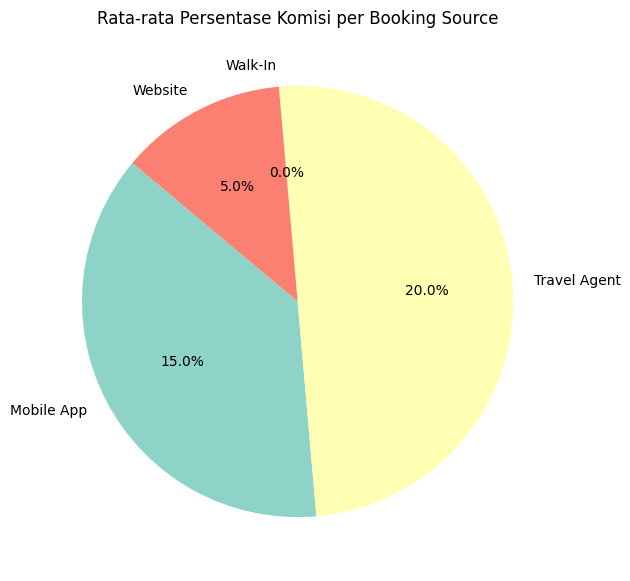

In [ ]:
kplt.figure(figsize=(7,7))
plt.pie(
    mean_vals,
    labels=x,
    startangle=140,
    colors=plt.cm.Set3.colors,
    autopct=lambda p: '{:.1f}%'.format(p*sum(mean_vals)/100)  # tampilkan mean asli
)
plt.title("Rata-rata Persentase Komisi per Booking Source")
plt.show()
